In [4]:
!git clone https://github.com/meituan/YOLOv6


fatal: destination path 'YOLOv6' already exists and is not an empty directory.


In [ ]:
!unzip /content/YoloV6_Chess.zip

In [5]:
cd YOLOv6

/content/YOLOv6


In [ ]:
!pip install -r requirements.txt

In [7]:
import torch
torch.cuda.is_available() 
torch.cuda.get_device_name(0)

'Tesla T4'

In [8]:
torch.hub.download_url_to_file('https://github.com/meituan/YOLOv6/releases/download/0.2.0/yolov6s.pt', 'yolov6s.pt')

  0%|          | 0.00/36.3M [00:00<?, ?B/s]

In [ ]:
!python tools/infer.py --weights yolov6s.pt --source data/images/image1.jpg

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='data/images/image1.jpg', view_img=False, weights='yolov6s.pt', yaml='data/coco.yaml')
Loading checkpoint from yolov6s.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 1/1 [00:00<00:00, 11.74it/s]
Results saved to runs/inference/exp


In [9]:
!python tools/train.py --batch 16 --conf configs/yolov6s_finetune.py --data-path /content/YOLOv6/yolov6/dataset/dataset.yaml --device 0 --epochs 10 --eval-interval 2

Using 1 GPU for training... 
training args are: Namespace(batch_size=16, calib=False, check_images=False, check_labels=False, conf_file='configs/yolov6s_finetune.py', data_path='/content/YOLOv6/yolov6/dataset/dataset.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=10, eval_final_only=False, eval_interval=2, gpu_count=0, heavy_eval_range=50, img_size=640, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp7', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Final numbers of valid images: 606/ labels: 606. 
0.0s for dataset initialization.
Convert to COCO format
100% 58/58 [00:00<00:00, 22101.36it/s]
Convert to COCO format finished. Resutls saved in /content/YOLOv6/yolov6/dataset/annotations/instances_valid.json
Val: Final numbers of valid images: 58/ labels: 58. 
0.0s for dataset initial

In [10]:
!python tools/eval.py --data /content/YOLOv6/yolov6/dataset/dataset.yaml  --weights /content/YOLOv6/runs/train/exp7/weights/best_ckpt.pt --device 0


Namespace(batch_size=32, conf_thres=0.03, config_file='', data='/content/YOLOv6/yolov6/dataset/dataset.yaml', device='0', do_coco_metric=True, do_pr_metric=False, eval_config_file='./configs/experiment/eval_640_repro.py', force_no_pad=False, half=False, img_size=640, iou_thres=0.65, letterbox_return_int=False, name='exp', not_infer_on_rect=False, plot_confusion_matrix=False, plot_curve=True, reproduce_640_eval=False, save_dir='runs/val/', scale_exact=False, task='val', test_load_size=640, verbose=False, weights='/content/YOLOv6/runs/train/exp7/weights/best_ckpt.pt')
Loading checkpoint from /content/YOLOv6/runs/train/exp7/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deplo

In [25]:
!python tools/infer.py --weights /content/YOLOv6/runs/train/exp6/weights/best_ckpt.pt --source /content/YOLOv6/yolov6/dataset/images/test --yaml /content/YOLOv6/yolov6/dataset/dataset.yaml --device 0 

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/yolov6/dataset/images/test', view_img=False, weights='/content/YOLOv6/runs/train/exp6/weights/best_ckpt.pt', yaml='/content/YOLOv6/yolov6/dataset/dataset.yaml')
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/exp6/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 29/29 [00:00<00:00, 37.52it/s]
Results saved to runs/inference/exp


In [29]:
!python tools/infer.py --weights /content/YOLOv6/runs/train/exp6/weights/best_ckpt.pt --source /content/YOLOv6/yolov6/dataset/images/train --yaml /content/YOLOv6/yolov6/dataset/dataset.yaml --device 0 

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/yolov6/dataset/images/train', view_img=False, weights='/content/YOLOv6/runs/train/exp6/weights/best_ckpt.pt', yaml='/content/YOLOv6/yolov6/dataset/dataset.yaml')
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/exp6/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 606/606 [00:14<00:00, 40.63it/s]
Results saved to runs/inference/exp


In [30]:
!python tools/infer.py --weights /content/YOLOv6/runs/train/exp6/weights/best_ckpt.pt --source /content/YOLOv6/yolov6/dataset/images/valid --yaml /content/YOLOv6/yolov6/dataset/dataset.yaml --device 0 

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/yolov6/dataset/images/valid', view_img=False, weights='/content/YOLOv6/runs/train/exp6/weights/best_ckpt.pt', yaml='/content/YOLOv6/yolov6/dataset/dataset.yaml')
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/exp6/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 58/58 [00:01<00:00, 41.07it/s]
Results saved to runs/inference/exp


In [ ]:
!zip -r /content/valid.zip /content/YOLOv6/runs/inference/exp/valid

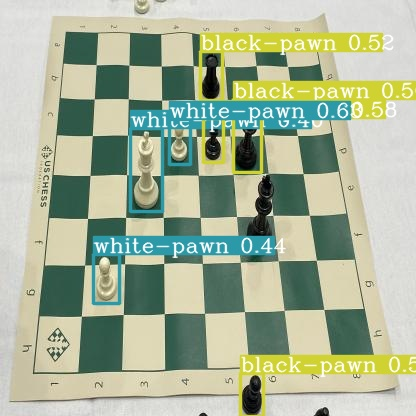

In [33]:
from IPython.display import Image #this is to render predictions
Image(filename='/content/YOLOv6/runs/inference/exp/test/685b860d412b91f5d4f7f9e643b84452_jpg.rf.2d78193e4021ae5ffb49ecd1060bebd7.jpg', width=1000)
